In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from unidecode import unidecode

In [2]:
# DATASET ORIGINAL ############################################################################################################

In [3]:
# Coleta dispensando colunas, dado o tamanho do arquivo
dados2 = pd.read_csv('vacinacaoRJ.csv',sep=';',usecols=['paciente_idade','paciente_enumsexobiologico','paciente_racacor_valor','estabelecimento_municipio_nome','estabelecimento_uf','vacina_dataaplicacao','vacina_fabricante_nome','vacina_descricao_dose',])


In [4]:
# Informações sobre o DataFrame dados2
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150532 entries, 0 to 9150531
Data columns (total 8 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   paciente_idade                  float64
 1   paciente_enumsexobiologico      object 
 2   paciente_racacor_valor          object 
 3   estabelecimento_municipio_nome  object 
 4   estabelecimento_uf              object 
 5   vacina_fabricante_nome          object 
 6   vacina_dataaplicacao            object 
 7   vacina_descricao_dose           object 
dtypes: float64(1), object(7)
memory usage: 558.5+ MB


In [5]:
dados2.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_nome,estabelecimento_uf,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose
0,66.0,M,AMARELA,SAO JOAO DE MERITI,RJ,FUNDACAO BUTANTAN,2021-04-18,1ª Dose
1,51.0,M,PARDA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-06-17,1ª Dose
2,52.0,F,PRETA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-05-12,1ª Dose
3,56.0,M,PRETA,RIO DE JANEIRO,RJ,FUNDACAO OSWALDO CRUZ,2021-05-04,1ª Dose
4,85.0,F,SEM INFORMACAO,PETROPOLIS,RJ,FUNDACAO OSWALDO CRUZ,2021-02-25,1ª Dose


In [6]:
# DATASET MANIPULADO ##########################################################################################################

In [7]:
dados2f = dados2

# Colunas renomeadas
dados2f.rename(columns={'paciente_enumsexobiologico': 'paciente_sexo','paciente_racacor_valor':'paciente_raca','estabelecimento_municipio_nome':'estab_municipio','estabelecimento_uf':'estab_uf','vacina_fabricante_nome':'vacina_fabricante'}, inplace = True)

In [8]:
# TRATAMENTO ##################################################################################################################

In [9]:
dados2f.isnull().sum()

paciente_idade           1
paciente_sexo            1
paciente_raca            1
estab_municipio          0
estab_uf                 0
vacina_fabricante        0
vacina_dataaplicacao     0
vacina_descricao_dose    0
dtype: int64

In [10]:
dados2f.paciente_sexo.value_counts()

F    5357185
M    3793345
I          1
Name: paciente_sexo, dtype: int64

In [11]:
# Tratamento dos registros nulos
dados2f['paciente_idade'].fillna(dados2f['paciente_idade'].mean(), inplace=True)
dados2f[['paciente_sexo','paciente_raca']] = dados2f[['paciente_sexo','paciente_raca']].fillna('Não informado')


In [12]:
dados2f.isnull().any()

paciente_idade           False
paciente_sexo            False
paciente_raca            False
estab_municipio          False
estab_uf                 False
vacina_fabricante        False
vacina_dataaplicacao     False
vacina_descricao_dose    False
dtype: bool

In [13]:
dados2f.dtypes

paciente_idade           float64
paciente_sexo             object
paciente_raca             object
estab_municipio           object
estab_uf                  object
vacina_fabricante         object
vacina_dataaplicacao      object
vacina_descricao_dose     object
dtype: object

In [14]:
# Definição da variável idade como int
dados2f.paciente_idade = dados2f.paciente_idade.astype(int)

# Ordenando dados2f pela idade
dados2f.sort_values(by='paciente_idade')

,paciente_idade,paciente_sexo,paciente_raca,estab_municipio,estab_uf,vacina_fabricante,vacina_dataaplicacao,vacina_descricao_dose
4930221,0,F,BRANCA,RIO DE JANEIRO,RJ,FUNDACAO OSWALDO CRUZ,2021-02-27,1ª Dose
8559398,0,F,PARDA,VOLTA REDONDA,RJ,FUNDACAO OSWALDO CRUZ,2021-07-01,2ª Dose
1001037,0,F,PARDA,NOVA IGUACU,RJ,FUNDACAO OSWALDO CRUZ,2021-07-01,1ª Dose
5221586,0,F,BRANCA,RIO DE JANEIRO,RJ,FUNDACAO OSWALDO CRUZ,2021-02-11,1ª Dose
7222802,0,F,PARDA,SAO GONCALO,RJ,MINISTERIO DA SAUDE,2021-06-14,1ª Dose
...,...,...,...,...,...,...,...,...
3695316,129,M,SEM INFORMACAO,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-06-23,2ª Dose
6461325,129,M,SEM INFORMACAO,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-06-23,1ª Dose
5196908,129,M,SEM INFORMACAO,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-06-23,1ª Dose
3924956,129,M,SEM INFORMACAO,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-05-21,1ª Dose


In [15]:
# Verificação de registros com idade inferior a 16 anos
dados2f[dados2f.paciente_idade < 16]


,paciente_idade,paciente_sexo,paciente_raca,estab_municipio,estab_uf,vacina_fabricante,vacina_dataaplicacao,vacina_descricao_dose
21679,5,F,SEM INFORMACAO,MACAE,RJ,SERUM INSTITUTE OF INDIA LTD,2021-03-25,1ª Dose
44612,13,M,PARDA,SAO GONCALO,RJ,SERUM INSTITUTE OF INDIA LTD,2021-04-16,1ª Dose
70924,14,F,PARDA,MESQUITA,RJ,FUNDACAO OSWALDO CRUZ,2021-02-02,1ª Dose
119180,8,F,PARDA,CAMPOS DOS GOYTACAZES,RJ,FUNDACAO BUTANTAN,2021-05-20,2ª Dose
196085,1,M,BRANCA,CAMPOS DOS GOYTACAZES,RJ,FUNDACAO OSWALDO CRUZ,2021-03-11,1ª Dose
...,...,...,...,...,...,...,...,...
8925405,15,F,BRANCA,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-02-16,2ª Dose
8939765,7,M,PARDA,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-02-16,2ª Dose
8942628,5,F,PARDA,DUQUE DE CAXIAS,RJ,FUNDACAO BUTANTAN,2021-06-16,2ª Dose
8974778,14,M,PARDA,PINHEIRAL,RJ,SINOVAC LIFE SCIENCE CO LTD,2021-06-08,1ª Dose


In [16]:
# Verificação de registros com idade superior a 118 anos
dados2f[dados2f.paciente_idade > 118]


,paciente_idade,paciente_sexo,paciente_raca,estab_municipio,estab_uf,vacina_fabricante,vacina_dataaplicacao,vacina_descricao_dose
53319,121,M,SEM INFORMACAO,SAO SEBASTIAO DO ALTO,RJ,FUNDACAO OSWALDO CRUZ,2021-01-25,1ª Dose
79296,121,M,SEM INFORMACAO,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-03-17,1ª Dose
80250,120,M,INDIGENA,PARATY,RJ,FUNDACAO BUTANTAN,2021-01-20,1ª Dose
181844,121,F,AMARELA,PORCIUNCULA,RJ,FUNDACAO BUTANTAN,2021-02-17,2ª Dose
275043,121,F,SEM INFORMACAO,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-05-06,2ª Dose
...,...,...,...,...,...,...,...,...
8676527,121,F,SEM INFORMACAO,MESQUITA,RJ,SERUM INSTITUTE OF INDIA LTD,2021-02-11,2ª Dose
8948664,121,F,SEM INFORMACAO,PIRAI,RJ,FUNDACAO BUTANTAN,2021-02-10,2ª Dose
8990661,121,F,SEM INFORMACAO,DUQUE DE CAXIAS,RJ,FUNDACAO BUTANTAN,2021-01-22,1ª Dose
9005180,121,F,SEM INFORMACAO,MESQUITA,RJ,FUNDACAO BUTANTAN,2021-01-20,1ª Dose


In [17]:
dados2f.vacina_dataaplicacao = pd.to_datetime(dados2f.vacina_dataaplicacao)
dados2f.vacina_dataaplicacao.describe()

count                 9150532
unique                    180
top       2021-04-19 00:00:00
freq                   142576
first     2021-01-02 00:00:00
last      2021-07-13 00:00:00
Name: vacina_dataaplicacao, dtype: object

In [18]:
# Filtrando registros que possuam data igual ou maior que 17/01/2020
dados2f.query('vacina_dataaplicacao >= "2021-01-17"', inplace=True)

In [19]:
dados2f.vacina_dataaplicacao.describe()

count                 9150528
unique                    178
top       2021-04-19 00:00:00
freq                   142576
first     2021-01-17 00:00:00
last      2021-07-13 00:00:00
Name: vacina_dataaplicacao, dtype: object

In [20]:
dados2f.sort_values(by='vacina_dataaplicacao')

,paciente_idade,paciente_sexo,paciente_raca,estab_municipio,estab_uf,vacina_fabricante,vacina_dataaplicacao,vacina_descricao_dose
5230593,29,M,SEM INFORMACAO,DUQUE DE CAXIAS,RJ,FUNDACAO BUTANTAN,2021-01-17,2ª Dose
3353181,63,F,AMARELA,COMENDADOR LEVY GASPARIAN,RJ,FUNDACAO BUTANTAN,2021-01-17,2ª Dose
5879690,56,F,SEM INFORMACAO,SAO GONCALO,RJ,FUNDACAO BUTANTAN,2021-01-17,2ª Dose
6095837,50,F,SEM INFORMACAO,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-01-17,1ª Dose
3919918,43,F,PARDA,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-01-17,2ª Dose
...,...,...,...,...,...,...,...,...
3313516,63,F,BRANCA,RIO DE JANEIRO,RJ,FUNDACAO OSWALDO CRUZ,2021-07-13,2ª Dose
4025320,45,F,PARDA,ITAGUAI,RJ,MINISTERIO DA SAUDE,2021-07-13,1ª Dose
3644094,50,F,SEM INFORMACAO,ANGRA DOS REIS,RJ,FUNDACAO OSWALDO CRUZ,2021-07-13,1ª Dose
4025308,35,F,PARDA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-07-13,1ª Dose


In [21]:
dados2f.vacina_descricao_dose.unique()

array(['1ª\xa0Dose', '2ª\xa0Dose', 'Dose\xa0'], dtype=object)

In [22]:
dados2f.vacina_descricao_dose = [unidecode(s) for s in dados2f['vacina_descricao_dose']]

In [23]:
dados2f.vacina_descricao_dose.unique()

array(['1a Dose', '2a Dose', 'Dose '], dtype=object)

In [24]:
# ANÁLISES ####################################################################################################################

In [25]:
analise2 = dados2f.groupby('vacina_dataaplicacao').size().reset_index()
analise2

,vacina_dataaplicacao,0
0,2021-01-17,46
1,2021-01-18,133
2,2021-01-19,3326
3,2021-01-20,52713
4,2021-01-21,31072
...,...,...
173,2021-07-09,76436
174,2021-07-10,53022
175,2021-07-11,4565
176,2021-07-12,54532


In [26]:
dados2f.vacina_dataaplicacao.value_counts()

2021-04-19    142576
2021-04-27    136616
2021-04-28    136523
2021-04-26    134314
2021-04-20    132204
               ...  
2021-03-14       182
2021-01-18       133
2021-05-23       127
2021-02-07        83
2021-01-17        46
Name: vacina_dataaplicacao, Length: 178, dtype: int64

In [27]:
# Média de doses por dia
dados2f.vacina_dataaplicacao.value_counts().mean()

51407.4606741573

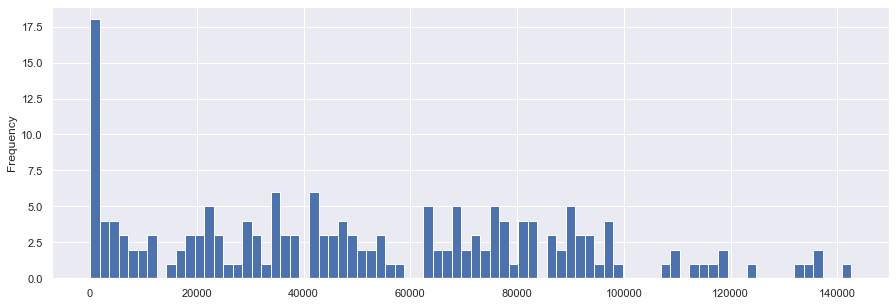

In [28]:
dados2f.vacina_dataaplicacao.value_counts().plot(kind='hist',bins=80, figsize=(15,5))

In [29]:
dados2f.vacina_dataaplicacao.dt.weekofyear

0          15
1          24
2          19
3          18
4           8
           ..
9150527    17
9150528    19
9150529    19
9150530    14
9150531    15
Name: vacina_dataaplicacao, Length: 9150528, dtype: int64

In [30]:
dados2f['vacina_semana'] = dados2f.vacina_dataaplicacao.dt.weekofyear

In [31]:
dados2f.sort_values(by='vacina_dataaplicacao')

,paciente_idade,paciente_sexo,paciente_raca,estab_municipio,estab_uf,vacina_fabricante,vacina_dataaplicacao,vacina_descricao_dose,vacina_semana
5230593,29,M,SEM INFORMACAO,DUQUE DE CAXIAS,RJ,FUNDACAO BUTANTAN,2021-01-17,2a Dose,2
3353181,63,F,AMARELA,COMENDADOR LEVY GASPARIAN,RJ,FUNDACAO BUTANTAN,2021-01-17,2a Dose,2
5879690,56,F,SEM INFORMACAO,SAO GONCALO,RJ,FUNDACAO BUTANTAN,2021-01-17,2a Dose,2
6095837,50,F,SEM INFORMACAO,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-01-17,1a Dose,2
3919918,43,F,PARDA,RIO DE JANEIRO,RJ,FUNDACAO BUTANTAN,2021-01-17,2a Dose,2
...,...,...,...,...,...,...,...,...,...
3313516,63,F,BRANCA,RIO DE JANEIRO,RJ,FUNDACAO OSWALDO CRUZ,2021-07-13,2a Dose,28
4025320,45,F,PARDA,ITAGUAI,RJ,MINISTERIO DA SAUDE,2021-07-13,1a Dose,28
3644094,50,F,SEM INFORMACAO,ANGRA DOS REIS,RJ,FUNDACAO OSWALDO CRUZ,2021-07-13,1a Dose,28
4025308,35,F,PARDA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-07-13,1a Dose,28


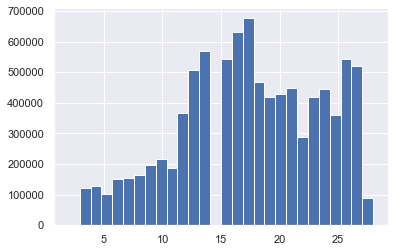

In [32]:
dados2f.vacina_semana.hist(bins=28)

In [33]:
# Média de doses por semana
dados2f.vacina_semana.value_counts().mean()

338908.44444444444

In [34]:
analise2 = dados2f.groupby(['vacina_dataaplicacao','estab_municipio']).size().reset_index()
analise2

,vacina_dataaplicacao,estab_municipio,0
0,2021-01-17,BELFORD ROXO,2
1,2021-01-17,COMENDADOR LEVY GASPARIAN,1
2,2021-01-17,DUQUE DE CAXIAS,3
3,2021-01-17,MIGUEL PEREIRA,1
4,2021-01-17,RIO DE JANEIRO,19
...,...,...,...
11800,2021-07-13,SAO JOAO DE MERITI,429
11801,2021-07-13,SAO PEDRO DA ALDEIA,95
11802,2021-07-13,SEROPEDICA,40
11803,2021-07-13,SILVA JARDIM,129


In [35]:
analise2 = dados2f.groupby(['estab_municipio']).size().reset_index()
analise2

,estab_municipio,0
0,ANGRA DOS REIS,95663
1,APERIBE,6644
2,ARARUAMA,51810
3,AREAL,7961
4,ARMACAO DOS BUZIOS,12248
...,...,...
87,TRES RIOS,37373
88,VALENCA,42602
89,VARRE-SAI,2984
90,VASSOURAS,12914


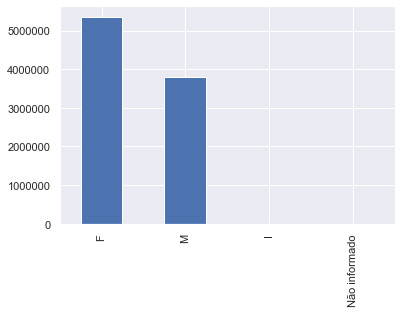

In [36]:
dados2f.paciente_sexo.value_counts().plot(kind='bar')

In [37]:
analise2 = dados2f.groupby(['paciente_sexo'])['paciente_idade'].mean()
analise2

paciente_sexo
F                58.095316
I                69.000000
M                57.611342
Não informado    57.000000
Name: paciente_idade, dtype: float64

In [38]:
analise2 = dados2f.groupby(['estab_municipio'])['paciente_idade'].mean()
analise2

estab_municipio
ANGRA DOS REIS        54.854803
APERIBE               57.416616
ARARUAMA              63.669427
AREAL                 57.036930
ARMACAO DOS BUZIOS    59.246897
                        ...    
TRES RIOS             59.975490
VALENCA               59.652833
VARRE-SAI             60.860255
VASSOURAS             53.646430
VOLTA REDONDA         55.719923
Name: paciente_idade, Length: 92, dtype: float64

In [39]:
dados2f.paciente_raca.value_counts()

SEM INFORMACAO    3660960
BRANCA            2409498
PARDA             1780424
AMARELA            681708
PRETA              614797
INDIGENA             3140
Não informado           1
Name: paciente_raca, dtype: int64

In [40]:
dados2f.paciente_raca.value_counts(normalize= True)

SEM INFORMACAO    4.000818e-01
BRANCA            2.633179e-01
PARDA             1.945706e-01
AMARELA           7.449931e-02
PRETA             6.718705e-02
INDIGENA          3.431496e-04
Não informado     1.092833e-07
Name: paciente_raca, dtype: float64

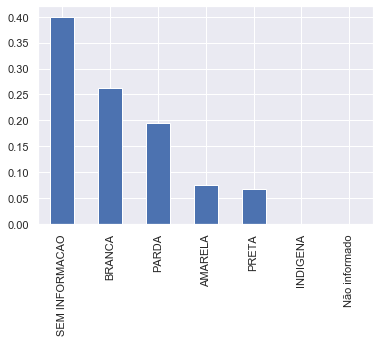

In [41]:
dados2f.paciente_raca.value_counts(normalize= True).plot(kind='bar')

In [42]:
dados2f.vacina_fabricante.value_counts(normalize = True)

FUNDACAO BUTANTAN               0.424008
FUNDACAO OSWALDO CRUZ           0.414101
MINISTERIO DA SAUDE             0.146510
SERUM INSTITUTE OF INDIA LTD    0.009841
SINOVAC LIFE SCIENCE CO LTD     0.004971
BioNTech/Fosun Pharma/Pfizer    0.000415
Janssen-Cilag                   0.000155
Name: vacina_fabricante, dtype: float64

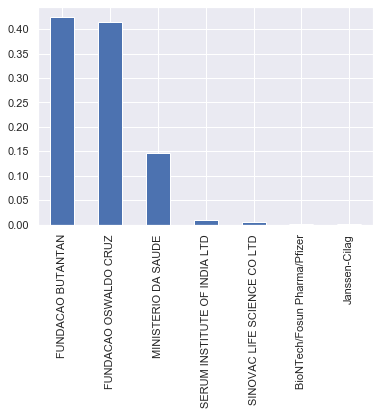

In [43]:
dados2f.vacina_fabricante.value_counts(normalize = True).plot(kind='bar')

In [44]:
dados2f.vacina_descricao_dose.value_counts(normalize = True)

1a Dose    0.721798
2a Dose    0.257259
Dose       0.020942
Name: vacina_descricao_dose, dtype: float64

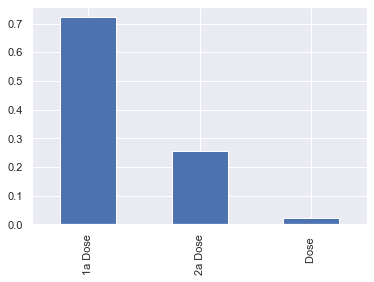

In [45]:
dados2f.vacina_descricao_dose.value_counts(normalize = True).plot(kind='bar')

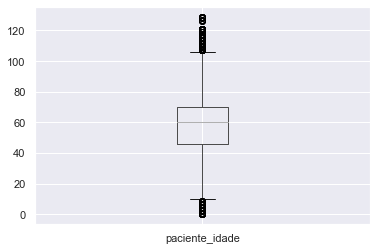

In [46]:
dados2f.boxplot(column='paciente_idade')
plt.show()

In [47]:
dados2f.head()

,paciente_idade,paciente_sexo,paciente_raca,estab_municipio,estab_uf,vacina_fabricante,vacina_dataaplicacao,vacina_descricao_dose,vacina_semana
0,66,M,AMARELA,SAO JOAO DE MERITI,RJ,FUNDACAO BUTANTAN,2021-04-18,1a Dose,15
1,51,M,PARDA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-06-17,1a Dose,24
2,52,F,PRETA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-05-12,1a Dose,19
3,56,M,PRETA,RIO DE JANEIRO,RJ,FUNDACAO OSWALDO CRUZ,2021-05-04,1a Dose,18
4,85,F,SEM INFORMACAO,PETROPOLIS,RJ,FUNDACAO OSWALDO CRUZ,2021-02-25,1a Dose,8


In [48]:
pivot = dados2f.pivot(columns = 'vacina_descricao_dose', values = 'vacina_descricao_dose')
pivot

vacina_descricao_dose,1a Dose,2a Dose,Dose
0,1a Dose,NaN,NaN
1,1a Dose,NaN,NaN
2,1a Dose,NaN,NaN
3,1a Dose,NaN,NaN
4,1a Dose,NaN,NaN
...,...,...,...
9150527,NaN,2a Dose,NaN
9150528,NaN,2a Dose,NaN
9150529,NaN,2a Dose,NaN
9150530,NaN,2a Dose,NaN


In [49]:
pivot.rename(columns={'1a Dose':'1dose','2a Dose':'2dose','Dose ':'doseU'},inplace=True)

In [50]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9150528 entries, 0 to 9150531
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   1dose   object
 1   2dose   object
 2   doseU   object
dtypes: object(3)
memory usage: 279.3+ MB


In [51]:
pivot

vacina_descricao_dose,1dose,2dose,doseU
0,1a Dose,NaN,NaN
1,1a Dose,NaN,NaN
2,1a Dose,NaN,NaN
3,1a Dose,NaN,NaN
4,1a Dose,NaN,NaN
...,...,...,...
9150527,NaN,2a Dose,NaN
9150528,NaN,2a Dose,NaN
9150529,NaN,2a Dose,NaN
9150530,NaN,2a Dose,NaN


In [52]:
pivot.isnull().sum()

vacina_descricao_dose
1dose    2545692
2dose    6796469
doseU    8958895
dtype: int64

In [53]:
pivot[['1dose','2dose','doseU']] = pivot[['1dose','2dose','doseU']].fillna(0)
pivot.isnull().sum()

vacina_descricao_dose
1dose    0
2dose    0
doseU    0
dtype: int64

In [54]:
pivot['1dose'] = pivot['1dose'].replace('1a Dose',1)
pivot['2dose'] = pivot['2dose'].replace('2a Dose',1)
pivot['doseU'] = pivot['doseU'].replace('Dose ',1)

In [55]:
pivot['1dose'] = pivot['1dose'].astype(int)
pivot['2dose'] = pivot['2dose'].astype(int)
pivot.doseU = pivot.doseU.astype(int)

In [56]:
dados2f = pd.concat([dados2f,pivot],axis=1)

In [57]:
dados2f

,paciente_idade,paciente_sexo,paciente_raca,estab_municipio,estab_uf,vacina_fabricante,vacina_dataaplicacao,vacina_descricao_dose,vacina_semana,1dose,2dose,doseU
0,66,M,AMARELA,SAO JOAO DE MERITI,RJ,FUNDACAO BUTANTAN,2021-04-18,1a Dose,15,1,0,0
1,51,M,PARDA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-06-17,1a Dose,24,1,0,0
2,52,F,PRETA,RIO DE JANEIRO,RJ,MINISTERIO DA SAUDE,2021-05-12,1a Dose,19,1,0,0
3,56,M,PRETA,RIO DE JANEIRO,RJ,FUNDACAO OSWALDO CRUZ,2021-05-04,1a Dose,18,1,0,0
4,85,F,SEM INFORMACAO,PETROPOLIS,RJ,FUNDACAO OSWALDO CRUZ,2021-02-25,1a Dose,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9150527,61,F,SEM INFORMACAO,NITEROI,RJ,FUNDACAO OSWALDO CRUZ,2021-04-26,2a Dose,17,0,1,0
9150528,44,M,SEM INFORMACAO,BELFORD ROXO,RJ,FUNDACAO BUTANTAN,2021-05-10,2a Dose,19,0,1,0
9150529,29,M,SEM INFORMACAO,CAMPOS DOS GOYTACAZES,RJ,FUNDACAO BUTANTAN,2021-05-13,2a Dose,19,0,1,0
9150530,79,F,SEM INFORMACAO,MACAE,RJ,FUNDACAO BUTANTAN,2021-04-06,2a Dose,14,0,1,0


In [58]:
dadosVacina = dados2f.groupby(['vacina_dataaplicacao','estab_municipio'])['1dose','2dose','doseU'].sum().reset_index()
dadosVacina.rename(columns={'paciente_idade':'vacina_total'}, inplace = True)
dadosVacina

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vacina_dataaplicacao,estab_municipio,1dose,2dose,doseU
0,2021-01-17,BELFORD ROXO,2,0,0
1,2021-01-17,COMENDADOR LEVY GASPARIAN,0,1,0
2,2021-01-17,DUQUE DE CAXIAS,0,3,0
3,2021-01-17,MIGUEL PEREIRA,1,0,0
4,2021-01-17,RIO DE JANEIRO,5,14,0
...,...,...,...,...,...
11800,2021-07-13,SAO JOAO DE MERITI,423,6,0
11801,2021-07-13,SAO PEDRO DA ALDEIA,95,0,0
11802,2021-07-13,SEROPEDICA,40,0,0
11803,2021-07-13,SILVA JARDIM,0,0,129


In [59]:
dadosVacina.to_csv('dadosVacinaRJ.csv',  index=False)